In [157]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [158]:
df = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-v-ostrouhov/shared/homeworks/python_ds_miniprojects/5/transaction_data.csv')

In [200]:
df_update = pd.read_csv('transaction_data_updated.csv')

In [159]:
df

,date,name,transaction
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled
1,2020-03-02 00:59:09,Irina_Fedorova,successfull
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled
...,...,...,...
5310,2020-03-02 00:09:28,Vasilisa_Fedorova,successfull
5311,2020-03-02 00:46:31,Vasilisa_Ozerova,successfull
5312,2020-03-02 00:16:38,Olga_Polyanova,successfull
5313,2020-03-02 00:13:00,Ekaterina_Smirnova,successfull


In [163]:
df1 = df['transaction'].value_counts()

In [170]:
df1 = df1.reset_index()

In [171]:
df1

,index,transaction
0,successfull,3692
1,cancelled,1619
2,error,4


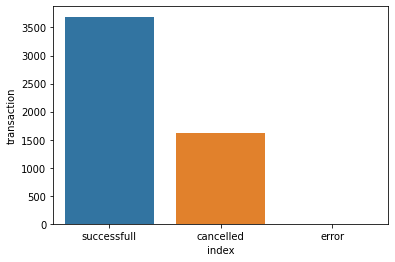

In [174]:
sns.barplot(data=df1, x='index', y='transaction')

In [176]:
df_suc = df.query('transaction == "successfull"')

In [180]:
df_suc_count = df_suc.groupby('name', as_index=False).agg({'transaction': 'count'})

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


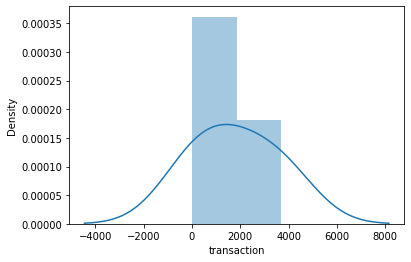

In [192]:
sns.distplot(df_suc_count.transaction)

In [193]:
df_suc_count.describe()

,transaction
count,56.000000
mean,65.928571
std,7.787769
min,46.000000
25%,61.000000
50%,64.000000
75%,72.000000
max,82.000000


In [201]:
df_update

,date,name,transaction,minute
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17
...,...,...,...,...
5310,2020-03-02 00:09:28,Vasilisa_Fedorova,successfull,9
5311,2020-03-02 00:46:31,Vasilisa_Ozerova,successfull,46
5312,2020-03-02 00:16:38,Olga_Polyanova,successfull,16
5313,2020-03-02 00:13:00,Ekaterina_Smirnova,successfull,13


In [223]:
user_vs_minute_pivot = df_update.groupby(['name', 'minute'], as_index=False)  \
    .agg({'transaction': 'count'})  \
    .pivot(index='minute', columns='name', values='transaction')  \
    .fillna(0)

In [224]:
df_update['date'] = pd.to_datetime(df_update['date'])

In [225]:
df_update['true_minute'] = df_update.date.dt.minute + df_update.date.dt.hour * 60

In [231]:
user_vs_minute_pivot1 = df_update.groupby(['name', 'true_minute'], as_index=False)  \
    .agg({'transaction': 'count'})  \
    .pivot(index='true_minute', columns='name', values='transaction')  \
    .fillna(0)  \
    .

In [240]:
user_vs_minute_pivot2 = df_update.groupby('true_minute', as_index=False)  \
    .agg({'transaction': 'count'})  \

In [241]:
user_vs_minute_pivot2

,true_minute,transaction
0,0,64
1,1,77
2,2,68
3,3,65
4,4,57
...,...,...
85,85,68
86,86,52
87,87,59
88,88,62


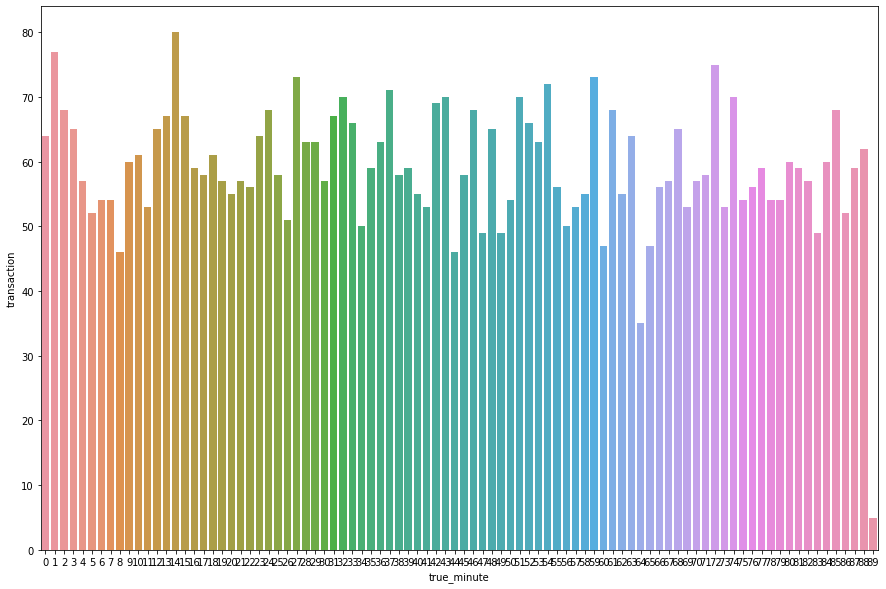

In [244]:
plt.figure(figsize=(15, 10))
sns.barplot(x='true_minute' ,y='transaction', data=user_vs_minute_pivot2)